# Statistics

# import functions

In [859]:
#python functions
from sqlays import export_sql, import_sql
from matheq import Cel_to_Kel, Kel_to_Cel, to_pot_temp
from mapscre import station_map, bathy_data, contour_ver, TS_diagram
from iscays import sum_up, isc_summary, depth_bin_interval, particle_bin_interval, isc_xlsx, read_isc
from ctdays import find_start_row, raw_ctd_to_df
from graphcre import deployment_constancy, vertical_each_org_distribution, stacked_vertical_distribution, comp_vertical_distribution
from matheq import calDist
from timeinfo import day_night
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon
from matplotlib import gridspec
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.ndimage.filters import gaussian_filter1d
import os, glob, datetime, gsw, cmocean, math
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from skbio.stats.ordination import cca
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import maskoceans
from scipy.interpolate import griddata

In [349]:
# R functions install one time enough
import rpy2.robjects.packages as rpackages
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

# utils.install_packages("vegan") done

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f90fe232280> [RTYPES.NILSXP]

In [350]:
# Import R packages
vegan = rpackages.importr("vegan")
# vegan.__dict__['_rpy2r'] to see possible functions

# datafram conversion python to R
# Allow conversion
import rpy2.robjects as ro


# import data

In [457]:
file_path = os.path.expanduser('~/Git/OCEANpy/data')
plt_path = os.path.expanduser('~/Git/OCEANpy/plots')
loki_df = export_sql('loki', 'all', 'awi_server')
ctd_df = export_sql('ctd', 'ctd_meta', 'local')
isc_stb = export_sql('isc', 'isc_meta', 'local')
isc_file_list = glob.glob(file_path+os.sep+'isc'+os.sep+'*.xlsx')
isc_each_stb = isc_stb[isc_stb['cruise_station_haul'].str.contains('PS107') & isc_stb['profile_number'].notnull()]


# station map

In [689]:
topo_array = bathy_data (70, 90, -20, 20) # -30, 30, 75, 85
ctd_stations = ('PS107_16-3', 'PS107_10-4', 'PS107_12-3', 'PS107_14-1')
ctd_df_sel = ctd_df.loc[ctd_df['Event'].str.contains('|'.join(ctd_stations))]

In [816]:
lat = list(pd.to_numeric(ctd_df_sel['Latitude']).drop_duplicates().values)
lon = list(pd.to_numeric(ctd_df_sel['Longitude']).drop_duplicates().values)
print(lat, lon)

[78.9768, 78.9448, 78.92699999999999, 79.0045] [2.4943, 2.7017, 2.8503, 2.2836]


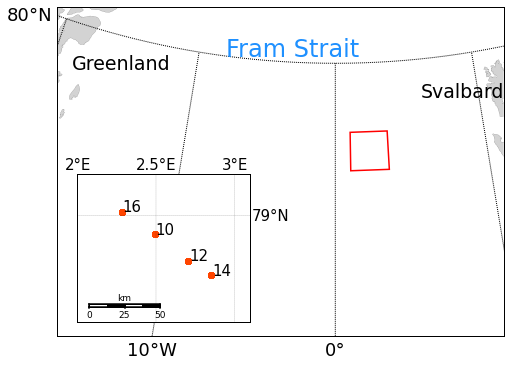

In [904]:
# maps

fig = plt.figure(figsize =(8, 8))


m = Basemap(projection='eqdc', lat_0 = 78, lon_0 = 0,lat_1=70, resolution = 'h',
        llcrnrlon = -15, llcrnrlat = 76, urcrnrlon = 13, urcrnrlat = 80.5)
m.drawcoastlines(linewidth=0.1)
m.drawmapboundary()
m.fillcontinents(color='lightgrey')
#m.shadedrelief()
#m.drawcountries()
#m.arcgisimage(service='Ocean_Basemap', xpixels = 5000)

m.drawparallels(np.arange(60, 86, 5), labels=[1,0,0,0], fontsize=18) # line for latitude 
m.drawmeridians(np.arange(-30, 30, 10), labels=[0,0,0,1], fontsize=18) # line for longitude


# add text
f_x, f_y = m(-8, 80)
plt.text(f_x, f_y, 'Fram Strait', size=24, color='dodgerblue')

g_x, g_y = m(-18.5, 79.4)
plt.text(g_x, g_y, 'Greenland', size=19, color='black')

s_x, s_y = m(6, 79.5)
plt.text(s_x, s_y, 'Svalbard', size=19, color='black')



b_lats = [ 78.6, 79.1, 79.1, 78.6 ]
b_lons = [ 1, 1, 3.5, 3.5 ]
x, y = m( b_lons, b_lats )
xy = zip(x,y)
poly = Polygon( list(xy), facecolor='none', ec='red', linewidth=1.5)
plt.gca().add_patch(poly)



## subplot
ax2 = fig.add_axes([0.16, 0.22, 0.3, 0.3])
m = Basemap(projection='merc', lat_0 = 79, lon_0 = 2.5, resolution = 'h',
        llcrnrlon = 2, llcrnrlat = 78.87, urcrnrlon = 3.1, urcrnrlat = 79.05)
m.drawcoastlines(linewidth=0.4)
m.drawmapboundary()
m.fillcontinents(color='lightgrey')

m.drawparallels(np.arange(60, 86, 0.5), labels=[0,1,0,0], fontsize=15, linewidth=0.2) # line for latitude 
m.drawmeridians(np.arange(-30, 30, 0.5), labels=[0,0,1,0], fontsize=15, linewidth=0.2) # line for longitude

# add station point
lon_x, lat_y = m(lon, lat)
ax2.scatter(lon_x, lat_y, color='orangered')


x_16, y_16 = m(2.284 , 79.0045)
ax2.text(x_16, y_16, '16', fontsize=15)
x_10, y_10 = m(2.496 , 78.9768)
ax2.text(x_10, y_10, '10', fontsize=15)
x_12, y_12 = m(2.71 , 78.9448)
ax2.text(x_12, y_12, '12', fontsize=15)
x_14, y_14 = m(2.86 , 78.92699999999999)
ax2.text(x_14, y_14, '14', fontsize=15)

m.drawmapscale(2.3 , 78.89, 2.3 , 78.98, 50, barstyle='fancy')


plt.savefig(os.path.join(plt_path,'station_map.pdf'), dpi=300)
plt.show()
plt.close()

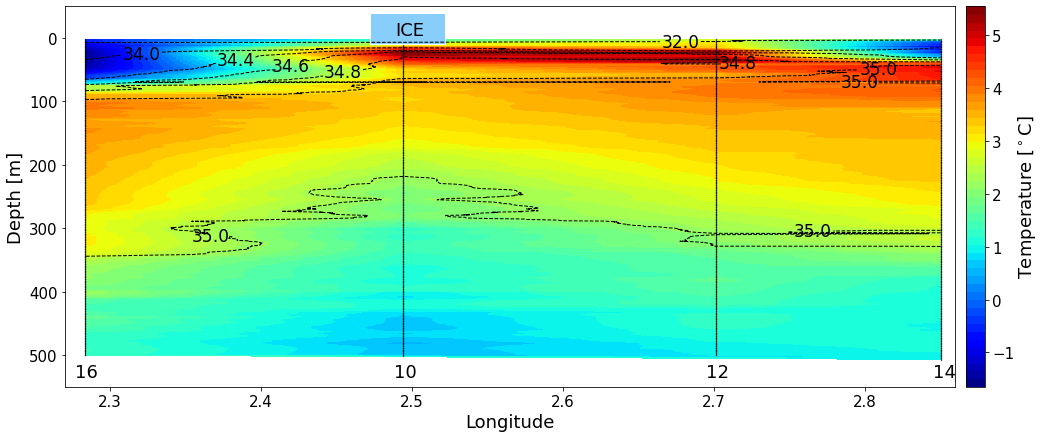

In [883]:
# vertical
depth = list(pd.to_numeric(ctd_df_sel['Depth water [m]']).values)
lat = list(pd.to_numeric(ctd_df_sel['Latitude']).values)
lon = list(pd.to_numeric(ctd_df_sel['Longitude']).values)

# create array for contour
temp = list(pd.to_numeric(ctd_df_sel['Temp [°C]']).values)
temp_array = np.array((lat, lon, temp, depth)).transpose()

sal_levels = (32, 34, 34.4, 34.6, 34.8, 35)
sal = list(pd.to_numeric(ctd_df_sel['Sal']).values)
sal_array = np.array((lat, lon, sal, depth)).transpose() # create array

# plotting
fig, ax = plt.subplots(figsize=(19,7))
temp_cntr = ax.tricontourf(temp_array[:,1], temp_array[:,3], temp_array[:,2], 50, cmap='jet') # add contour of temp with filled
sal_cntr = ax.tricontour(sal_array[:,1], sal_array[:,3], sal_array[:,2], levels=sal_levels, colors='black', linewidths=1, linestyles='--') # add contour of temp with filled
c_labels = ax.clabel(sal_cntr, inline=50, fontsize=17, levels=sal_levels, fmt='%1.1f')


cbar = fig.colorbar(temp_cntr, pad=0.01, ticks = range( math.floor(np.nanmin(temp_array[:,2])), math.ceil(np.nanmax(temp_array[:,2])),
                                        math.ceil(abs(math.floor(np.nanmin(temp_array[:,2]))-math.ceil(np.nanmax(temp_array[:,2])))/10)) )
cbar.ax.set_ylabel('Temperature [$^\circ$C]', rotation=90, labelpad=2, size=18)  # Fluorescence [mg m$^{-3}$] / Temp [dC] / Salinity [PSU] / Press [dbar]
cbar.ax.tick_params(axis='y', labelsize=15)

for l in c_labels:
    l.set_rotation(0)


ax.scatter(lon, depth, color='black', s=0.09) # add scatter for data point

# adjust
plt.ylim(-50, 550)
plt.xlim(2.27, 2.86)
plt.gca().invert_yaxis()


# label control
plt.ylabel('Depth [m]', size=18)
plt.xlabel('Longitude', size=18)
plt.tick_params(axis='both', labelsize=15)

# add text
plt.text(2.277, 535, '16', size=18)
plt.text(2.488, 535, '10', size=18)
plt.text(2.695, 535, '12', size=18)
plt.text(2.845, 535, '14', size=18)

plt.gca().add_patch(Rectangle((2.472, -40), 0.05, 50, facecolor='lightskyblue', ec='white'))
plt.text(2.489, -5, 'ICE', size=18)


plt.savefig(os.path.join(plt_path,'vertical_map.pdf'), dpi=300)
plt.show()
plt.close()

# Hydrography data

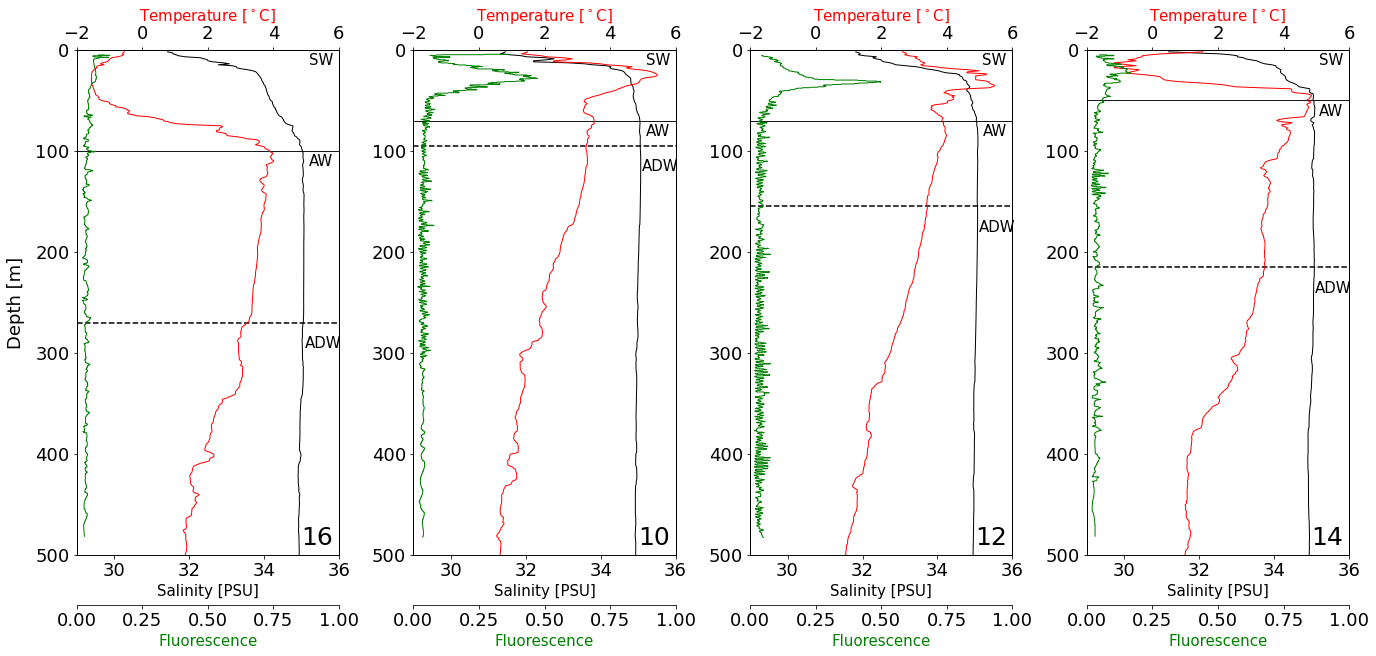

In [940]:
wm_dict = {'PS107_010-5': (70, 95), 'PS107_012-4': (70, 155), 'PS107_014-5': (50, 215), 'PS107_016-4': (100, 270)}
loki_stations = ('PS107_016-4', 'PS107_010-5', 'PS107_012-4', 'PS107_014-5')
loki_df_sel = loki_df.loc[loki_df['station'].str.contains('|'.join(loki_stations))]

fig = plt.figure(constrained_layout=True, figsize =(19, 9))
gs = fig.add_gridspec(1, 4)

n = 0
for i in loki_stations:
    up, down = wm_dict[i]
    cruise, station = i.split('_')[0], int(i.split('_')[1].split('-')[0])
    loki_station_df = loki_df_sel.loc[loki_df_sel['station'] == i]
    ctd_station_df = ctd_df.loc[ctd_df['Event'].str.contains(str(cruise+'_'+str(station)))]


    ax = fig.add_subplot(gs[0,n])
    ax.plot(tuple(pd.to_numeric(ctd_station_df['Sal'])), tuple(pd.to_numeric(ctd_station_df['Depth water [m]'])), color='black', linewidth= 1)
    ax.set_xlabel('Salinity [PSU]', color = 'black', fontsize=15)
    ax.set_ylim(0,500)
    ax.set_xlim(29,36)
    ax.tick_params(axis='both', labelsize=18)

    sec_axs = ax.twiny()
    sec_axs.plot(tuple(pd.to_numeric(ctd_station_df['Temp [°C]'])), tuple(pd.to_numeric(ctd_station_df['Depth water [m]'])), color='red', linewidth= 1)
    sec_axs.set_xlim(-2,6)
    sec_axs.set_xlabel('Temperature [$^\circ$C]', color = 'red', fontsize=15)
    sec_axs.tick_params(axis='x', labelsize=18)

    
    thr_axs = ax.twiny()
    thr_axs.spines['bottom'].set_position(('outward', 50))  # make new outmost axis                  
    thr_axs.xaxis.set_ticks_position('bottom')
    thr_axs.xaxis.set_label_position('bottom')
    thr_axs.plot(gaussian_filter1d(loki_station_df['fluorescence'], sigma=10), loki_station_df['loki_depth'], color='green', linewidth= 1)
    thr_axs.set_xlabel('Fluorescence', color = 'green', fontsize=15)
    thr_axs.set_xlim(0,1)
    thr_axs.invert_yaxis()
    thr_axs.tick_params(axis='x', labelsize=18)
    
    ax.text(35, 490, station, size=25)
    
    # water mass
    ax.axhline(y=up, color='black', ls='-', linewidth=0.9)
    ax.axhline(y=down, color='black', ls='--')
    ax.text(35.2, 15, 'SW', size=15)
    ax.text(35.2, up+15, 'AW', size=15)
    ax.text(35.1, down+25, 'ADW', size=15)
    
    if n==0:
        ax.set_ylabel('Depth [m]', color = 'black', fontsize=18, labelpad =10)
    
    n += 1

plt.savefig(os.path.join(plt_path,'hydrography.pdf'), dpi=300)
plt.show()
plt.close()



# data pre-processing

In [481]:
# data processing for LOKI data
sp_col = ['Chaetognatha', 'Rhizaria', 'Ostracoda', 'Calanus', 'Heterorhabdus', 'Metridia', 'Microcalanus',
          'Oithona', 'Oncaea', 'Paraeuchaeta', 'Pseudocalanus', 'Themisto']


sf_df = pd.DataFrame() # surface water mass df
aw_df = pd.DataFrame() # atlantic water mass df
adw_df = pd.DataFrame() # atlantic dense water mass df

for s in loki_stations:
    
    # count the sp with 5m depth bin
    each_st_df = loki_df_sel.loc[loki_df_sel['station'] == s]
    each_st_bin_df = pd.DataFrame(columns=sp_col)
    row = 0
    for d in range(0, math.ceil(max(each_st_df['loki_depth'])), 5):
        bin_df = each_st_df.loc[(each_st_df['loki_depth'] >= d) & (each_st_df['loki_depth'] < d+5)]
        for c in sp_col:
            if c == 'Chaetognatha' or c == 'Rhizaria': # check onlyin col = phylum
                count = bin_df['phylum'].loc[bin_df['phylum']==c].count()
                each_st_bin_df.loc[row, c] = count

            elif c == 'Ostracoda': # check onlyin col = class
                count = bin_df['class'].loc[bin_df['class']==c].count()
                each_st_bin_df.loc[row, c] = count
                
            else: # check onlyin col = genus
                count = bin_df['genus'].loc[bin_df['genus']==c].count()
                each_st_bin_df.loc[row, c] = count
        each_st_bin_df.loc[row, 'depth'] = d+5
        row += 1
    
    
    # add station number
    each_st_bin_df['station'] = s
    
    # move data to following water mass
    up, down = wm_dict[s]
    sf_df = sf_df.append(each_st_bin_df.loc[(each_st_bin_df['depth']>=0) & (each_st_bin_df['depth']<up)])
    aw_df = aw_df.append(each_st_bin_df.loc[(each_st_bin_df['depth']>=up) & (each_st_bin_df['depth']<down)])
    adw_df = adw_df.append(each_st_bin_df.loc[each_st_bin_df['depth']>=down])
    
    
    
    
sf_df.reset_index(drop=True, inplace = True)
aw_df.reset_index(drop=True, inplace = True)
adw_df.reset_index(drop=True, inplace = True)

sf_df['tag'] = 'surface'
aw_df['tag'] = 'atlantic'
adw_df['tag'] = 'atlantic_dense'

all_df = pd.concat([sf_df, aw_df, adw_df], ignore_index=True)

In [ ]:
# data processing for Particle data
isc_stations = ('PS107_16_2', 'PS107_10_3', 'PS107_12_2', 'PS107_14_7')
isc_sel_stb = isc_stb.loc[isc_stb['cruise_station_haul'].str.contains('|'.join(isc_stations))]


isc_all_df = pd.DataFrame(columns=['cruise_station_cast','lat', 'lon', 'depth', 'temp', 'sal','turb', 'fluo', 'ctd_total_vol', 'ctd_total_abd', 'med_ESD', 'avg_ESD', 'vol_150-500', 'vol_500-1000', 'vol_total', 'abd_150-500', 'abd_500-1000', 'abd_total' ])
for index, value in isc_sel_stb.iterrows():
    # select one station from one isc station and get cruise name, station number and profilenumber of ISC
    cruise, station, cast, profile_num = value['cruise_station_haul'].split('_')[0], int(float(value['cruise_station_haul'].split('_')[1])), str(value['cruise_station_haul'].split('_')[2]),int(float(value['profile_number']))
    # Based on the cruise and profilenumber of ISC import data from excel file
    isc_excel = str('IR'+str(profile_num).zfill(2)+'_DownCast_'+cruise+'.xlsx')
    for i in isc_file_list:
        if i.split(os.sep)[-1] == isc_excel:
            lat, lon = value['lat'], value['lon']
            particle_range = [150, 500, 1000, 100000] # micro meter
            # from here specific station.
            isc_ctd_df, vol_spec_df, aggr_con_df, size_spec_df = isc_xlsx(i, 10, particle_range, 'processed')
            df = pd.DataFrame(columns=['lat', 'lon', 'depth', 'temp', 'sal', 'turb', 'fluo', 'ctd_total_vol', 'ctd_total_abd', 'med_ESD', 'avg_ESD', 'vol_150-500', 'vol_500-1000', 'vol_total', 'abd_150-500', 'abd_500-1000', 'abd_total' ])
            df['depth'], df['sal'], df['temp']  = isc_ctd_df['Depths (m)'], isc_ctd_df['Salinity (PSU)'], isc_ctd_df['Temperature (dC)']
            df['turb'], df['fluo'] = isc_ctd_df['Turbidity (NTU)'], isc_ctd_df['Fluorescence (mg/m3)']
            df['ctd_total_vol'], df['ctd_total_abd'] = isc_ctd_df['Total Aggregate Volume (ppm)'], isc_ctd_df['Aggregate abundance (#/l)']
            df['med_ESD'], df['avg_ESD'] = isc_ctd_df['Median ESD (µm)'], isc_ctd_df['Average ESD (µm)']
            df['vol_150-500'], df['vol_500-1000'], df['vol_total'] = vol_spec_df['150-500'], vol_spec_df['500-1000'], vol_spec_df['total']
            df['abd_150-500'], df['abd_500-1000'], df['abd_total'] = aggr_con_df['150-500'], aggr_con_df['500-1000'], aggr_con_df['total']
            df['lat'], df['lon'] = lat, lon
            df['cruise_station_cast'] = str(cruise) +'_'+ str(station) +'_'+ str(cast)
            
            isc_all_df = isc_all_df.append(df, ignore_index=True)

isc_all_df = isc_all_df.dropna()

In [914]:
# tag water mass name on the particle data frame
wm_isc_dict = {'PS107_10_3': (70, 95), 'PS107_12_2': (70, 155), 'PS107_14_7': (50, 215), 'PS107_16_2': (100, 270)}

for key in wm_isc_dict:
    up, down = wm_isc_dict[key]
    isc_all_df.loc[(isc_all_df['cruise_station_cast']==key) & (isc_all_df['depth']>0) & (isc_all_df['depth']<=up) ,'tag'] = 'surface'
    isc_all_df.loc[(isc_all_df['cruise_station_cast']==key) & (isc_all_df['depth']>up) & (isc_all_df['depth']<=down) ,'tag'] = 'atlantic'
    isc_all_df.loc[(isc_all_df['cruise_station_cast']==key) & (isc_all_df['depth']>down),'tag'] = 'atlantic_dense'


    cruise_station_cast      lat      lon depth      temp        sal  \
0            PS107_10_3  78.9769   2.4908    10  4.352576  23.965060   
1            PS107_10_3  78.9769   2.4908    20  2.326581  32.062130   
2            PS107_10_3  78.9769   2.4908    30  4.584564  34.448854   
3            PS107_10_3  78.9769   2.4908    40  5.223962  34.663872   
4            PS107_10_3  78.9769   2.4908    50  4.737914  34.823360   
..                  ...      ...      ...   ...       ...        ...   
161          PS107_16_2  79.0023  2.26516   340  2.701866  34.996499   
162          PS107_16_2  79.0023  2.26516   350  2.451483  34.972098   
163          PS107_16_2  79.0023  2.26516   360  2.310153  34.960913   
164          PS107_16_2  79.0023  2.26516   370  2.144588  34.947994   
165          PS107_16_2  79.0023  2.26516   380  2.089433  34.945503   

         turb      fluo  ctd_total_vol  ctd_total_abd     med_ESD     avg_ESD  \
0    0.272179  0.070150       0.358555     178.765341 

# vertical distribution, both Paticle and Zooplankton

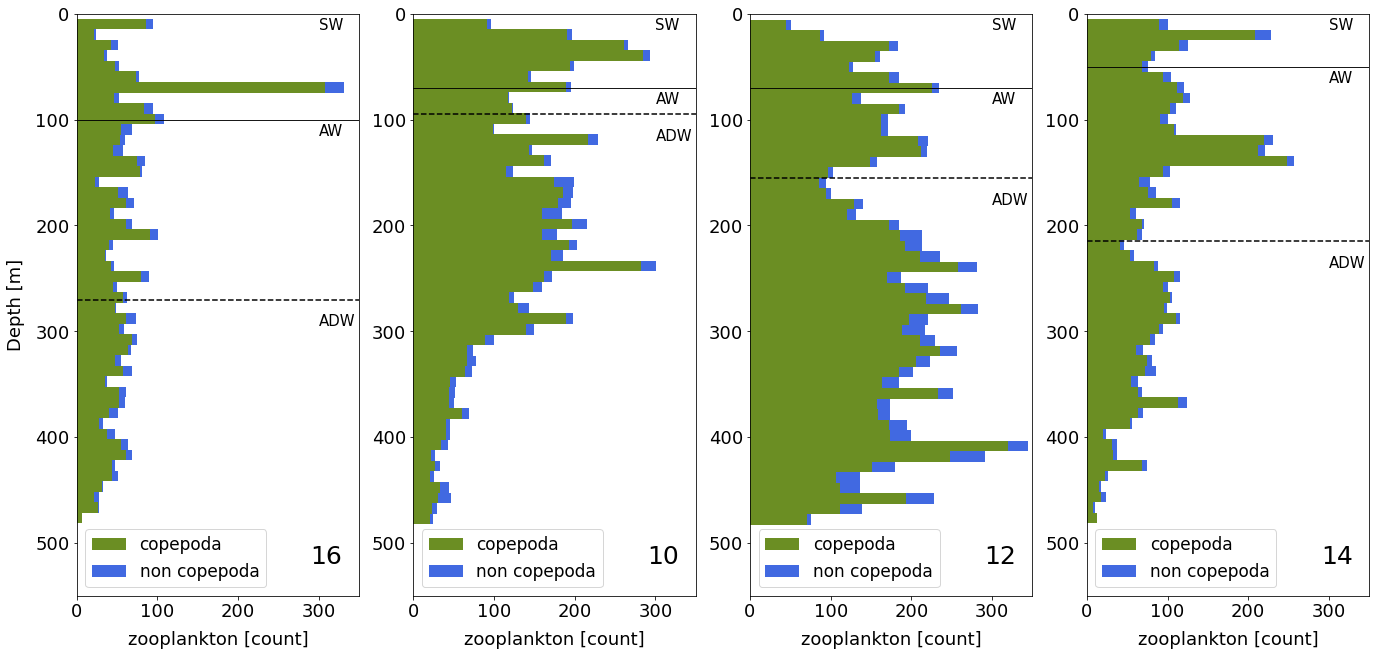

In [977]:
# Based on the cruise and profilenumber of ISC, import data from excel file
fig = plt.figure(constrained_layout=True, figsize =(19, 9))
gs = fig.add_gridspec(1, 4)

n = 0
for i in isc_stations:
    cruise, station = i.split('_')[0], i.split('_')[1]
    #  from here specific station
    isc_station_df = isc_all_df.loc[isc_all_df['cruise_station_cast'] == i]
    loki_station_df = loki_df[loki_df['station'].str.contains(cruise+'_'+str(station).zfill(3)) & loki_df['animal']==True] # select corresponding loki station
    
    copepoda_df = loki_station_df[loki_station_df['copepod']==True] # df only for copepoda
    copepoda_depth = copepoda_df['loki_depth'].to_list()

    no_copepoda_df = loki_station_df[loki_station_df['copepod']==False]
    no_copepoda_depth = no_copepoda_df['loki_depth'].to_list()

    ax = fig.add_subplot(gs[0,n])
    ax.hist([copepoda_depth, no_copepoda_depth],  bins=int(max(copepoda_depth)/10), stacked=True, color=['olivedrab', 'royalblue'], orientation='horizontal')
    ax.legend({'copepoda': 'olivedrab', 'non copepoda': 'royalblue'}, loc='lower left', fontsize=17)
    ax.set_xlim(0,350)
    ax.set_ylim(0,550)
    ax.set_xlabel('zooplankton [count]', color = 'black', fontsize=18, labelpad =10)
    ax.tick_params(axis='both', labelsize=18)
    ax.invert_yaxis()
    
    
    # add more
    up, down = wm_isc_dict[i]
    ax.axhline(y=up, color='black', ls='-', linewidth=0.9)
    ax.axhline(y=down, color='black', ls='--')
    ax.text(300, 15, 'SW', size=15)
    ax.text(300, up+15, 'AW', size=15)
    ax.text(300, down+25, 'ADW', size=15)
    
    ax.text(290, 520, station, size=25)
    
    if n==0:
        ax.set_ylabel('Depth [m]', color = 'black', fontsize=18, labelpad =10)
    
    
    n += 1

plt.savefig(os.path.join(plt_path,'zooplankton_all_hit.pdf'), dpi=300)
plt.show()
plt.close()


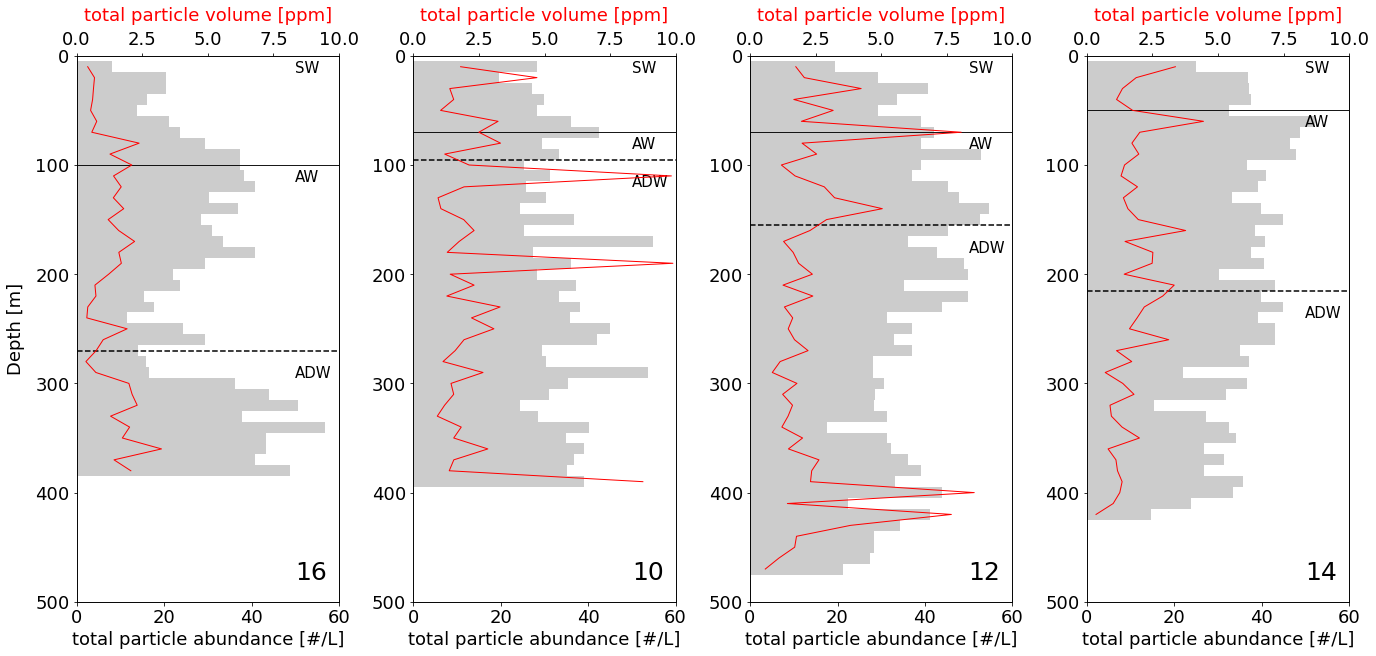

In [942]:
# particle data vertical profile

# Based on the cruise and profilenumber of ISC, import data from excel file
fig = plt.figure(constrained_layout=True, figsize =(19, 9))
gs = fig.add_gridspec(1, 4)

n = 0
for i in isc_stations:
    cruise, station = i.split('_')[0], i.split('_')[1]
    #  from here specific station
    isc_station_df = isc_all_df.loc[isc_all_df['cruise_station_cast'] == i]
    loki_station_df = loki_df[loki_df['station'].str.contains(cruise+'_'+str(station).zfill(3)) & loki_df['animal']==True] # select corresponding loki station
    
    copepoda_df = loki_station_df[loki_station_df['copepod']==True] # df only for copepoda
    copepoda_depth = copepoda_df['loki_depth'].to_list()
    
    ax = fig.add_subplot(gs[0,n])
    ax.barh( isc_station_df['depth'], isc_station_df['abd_total'], color='black', alpha=0.2, align='center', height=10)
    ax.set_xlabel('total particle abundance [#/L]', color = 'black', fontsize=18)
    ax.set_ylim(0,500)
    ax.set_xlim(0,60)
    ax.tick_params(axis='both', labelsize=18)
    
    
    sec_axs = ax.twiny()
    sec_axs.plot(isc_station_df['vol_total'], isc_station_df['depth'], color='red', linewidth= 1)
    sec_axs.set_xlabel('total particle volume [ppm]', color = 'red', fontsize=18, labelpad=10)
    sec_axs.set_xlim(0, 10)
    sec_axs.invert_yaxis()
    sec_axs.tick_params(axis='x', labelsize=18)

    # add more
    up, down = wm_isc_dict[i]
    ax.axhline(y=up, color='black', ls='-', linewidth=0.9)
    ax.axhline(y=down, color='black', ls='--')
    ax.text(50, 15, 'SW', size=15)
    ax.text(50, up+15, 'AW', size=15)
    ax.text(50, down+25, 'ADW', size=15)
    ax.text(50, 480, station, size=25)
    
    if n==0:
        ax.set_ylabel('Depth [m]', color = 'black', fontsize=18, labelpad =10)
    
    n += 1

plt.savefig(os.path.join(plt_path,'particle_total.pdf'), dpi=300)
plt.show()
plt.close()

# Linear Discriminant analysis

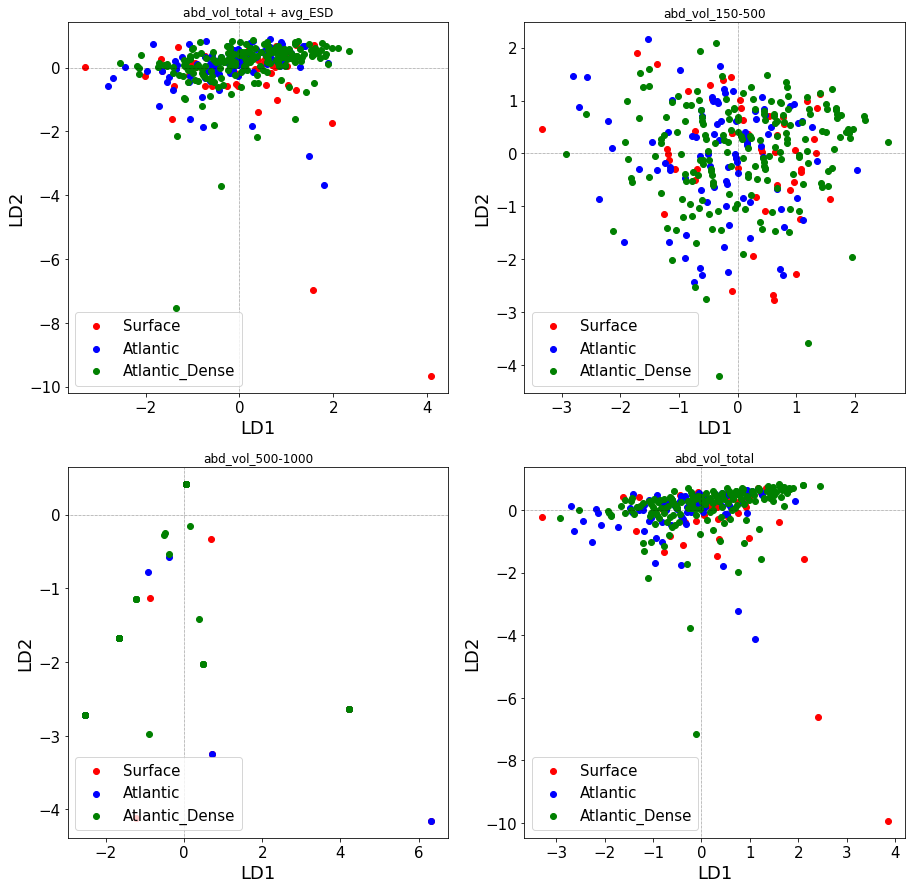

In [882]:
# LOKI zooplankton
# normalise data

isc_sel_df = isc_all_df[['abd_150-500','abd_500-1000','abd_total', 'vol_150-500','vol_500-1000','vol_total','avg_ESD', 'tag']]
all_df_scaled = StandardScaler().fit_transform(isc_sel_df[['abd_total', 'vol_total', 'avg_ESD']])

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(all_df_scaled, isc_sel_df['tag'])
df_lda = lda.transform(all_df_scaled)
df_lda_component = pd.DataFrame(df_lda,columns=['x', 'y'])
df_lda_component['target'] = all_df['tag']


# plot
fig, ax = plt.subplots(2,2, figsize =(15, 15))

ax1 = ax[0,0]
ax1.axhline(y=0, color='black', ls='dotted', linewidth=0.5)
ax1.axvline(x=0, color='black', ls='dotted', linewidth=0.5)

ax1.scatter(df_lda_component['x'].loc[df_lda_component['target']=='surface'], df_lda_component['y'].loc[df_lda_component['target']=='surface'], c='red', label='Surface')
ax1.scatter(df_lda_component['x'].loc[df_lda_component['target']=='atlantic'], df_lda_component['y'].loc[df_lda_component['target']=='atlantic'], c='blue', label='Atlantic')
ax1.scatter(df_lda_component['x'].loc[df_lda_component['target']=='atlantic_dense'], df_lda_component['y'].loc[df_lda_component['target']=='atlantic_dense'], c='green', label='Atlantic_Dense')

ax1.tick_params(axis='both', labelsize=15)
ax1.legend(loc='lower left', fontsize=15)
ax1.set_xlabel('LD1', size = 18)
ax1.set_ylabel('LD2', size = 18)
ax1.set_title('abd_vol_total + avg_ESD')




##########
all_df_scaled = StandardScaler().fit_transform(isc_sel_df[['abd_150-500', 'vol_150-500']])

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(all_df_scaled, isc_sel_df['tag'])
df_lda = lda.transform(all_df_scaled)
df_lda_component = pd.DataFrame(df_lda,columns=['x', 'y'])
df_lda_component['target'] = all_df['tag']


# plot
ax2 = ax[0,1]

ax2.axhline(y=0, color='black', ls='dotted', linewidth=0.5)
ax2.axvline(x=0, color='black', ls='dotted', linewidth=0.5)

ax2.scatter(df_lda_component['x'].loc[df_lda_component['target']=='surface'], df_lda_component['y'].loc[df_lda_component['target']=='surface'], c='red', label='Surface')
ax2.scatter(df_lda_component['x'].loc[df_lda_component['target']=='atlantic'], df_lda_component['y'].loc[df_lda_component['target']=='atlantic'], c='blue', label='Atlantic')
ax2.scatter(df_lda_component['x'].loc[df_lda_component['target']=='atlantic_dense'], df_lda_component['y'].loc[df_lda_component['target']=='atlantic_dense'], c='green', label='Atlantic_Dense')

ax2.tick_params(axis='both', labelsize=15)
ax2.legend(loc='lower left', fontsize=15)
ax2.set_xlabel('LD1', size = 18)
ax2.set_ylabel('LD2', size = 18)
ax2.set_title('abd_vol_150-500')


########
all_df_scaled = StandardScaler().fit_transform(isc_sel_df[['abd_500-1000', 'vol_500-1000']])

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(all_df_scaled, isc_sel_df['tag'])
df_lda = lda.transform(all_df_scaled)
df_lda_component = pd.DataFrame(df_lda,columns=['x', 'y'])
df_lda_component['target'] = all_df['tag']


# plot
ax3 = ax[1,0]

ax3.axhline(y=0, color='black', ls='dotted', linewidth=0.5)
ax3.axvline(x=0, color='black', ls='dotted', linewidth=0.5)

ax3.scatter(df_lda_component['x'].loc[df_lda_component['target']=='surface'], df_lda_component['y'].loc[df_lda_component['target']=='surface'], c='red', label='Surface')
ax3.scatter(df_lda_component['x'].loc[df_lda_component['target']=='atlantic'], df_lda_component['y'].loc[df_lda_component['target']=='atlantic'], c='blue', label='Atlantic')
ax3.scatter(df_lda_component['x'].loc[df_lda_component['target']=='atlantic_dense'], df_lda_component['y'].loc[df_lda_component['target']=='atlantic_dense'], c='green', label='Atlantic_Dense')

ax3.tick_params(axis='both', labelsize=15)
ax3.legend(loc='lower left', fontsize=15)
ax3.set_xlabel('LD1', size = 18)
ax3.set_ylabel('LD2', size = 18)
ax3.set_title('abd_vol_500-1000')



#######
all_df_scaled = StandardScaler().fit_transform(isc_sel_df[['abd_total', 'vol_total']])

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(all_df_scaled, isc_sel_df['tag'])
df_lda = lda.transform(all_df_scaled)
df_lda_component = pd.DataFrame(df_lda,columns=['x', 'y'])
df_lda_component['target'] = all_df['tag']


# plot
ax4 = ax[1,1]


ax4.axhline(y=0, color='black', ls='dotted', linewidth=0.5)
ax4.axvline(x=0, color='black', ls='dotted', linewidth=0.5)

ax4.scatter(df_lda_component['x'].loc[df_lda_component['target']=='surface'], df_lda_component['y'].loc[df_lda_component['target']=='surface'], c='red', label='Surface')
ax4.scatter(df_lda_component['x'].loc[df_lda_component['target']=='atlantic'], df_lda_component['y'].loc[df_lda_component['target']=='atlantic'], c='blue', label='Atlantic')
ax4.scatter(df_lda_component['x'].loc[df_lda_component['target']=='atlantic_dense'], df_lda_component['y'].loc[df_lda_component['target']=='atlantic_dense'], c='green', label='Atlantic_Dense')

ax4.tick_params(axis='both', labelsize=15)
ax4.legend(loc='lower left', fontsize=15)
ax4.set_xlabel('LD1', size = 18)
ax4.set_ylabel('LD2', size = 18)
ax4.set_title('abd_vol_total')


plt.savefig(os.path.join(plt_path,'all_LDA_particle.pdf'), dpi=300)


plt.show()
plt.close()

Zooplankton


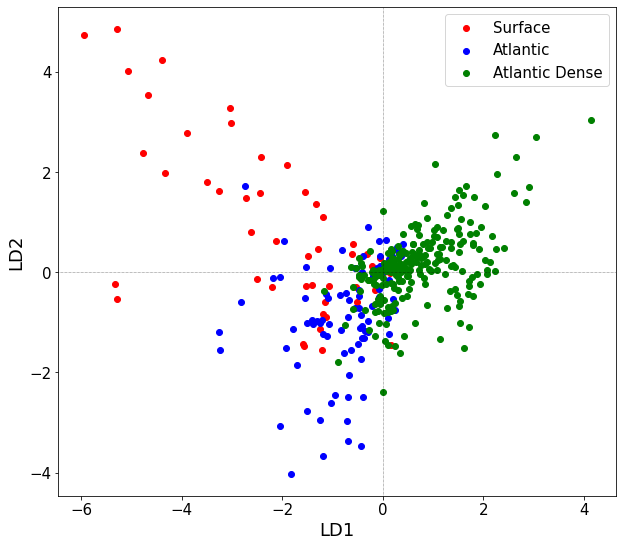

In [479]:
# LOKI zooplankton
# normalise data
all_df_scaled = StandardScaler().fit_transform(all_df[['Chaetognatha', 'Rhizaria', 'Ostracoda', 'Calanus', 'Heterorhabdus', 'Metridia', 'Microcalanus',
          'Oithona', 'Oncaea', 'Paraeuchaeta', 'Pseudocalanus', 'Themisto']])


lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(all_df_scaled, all_df['tag'])
df_lda = lda.transform(all_df_scaled)
df_lda_component = pd.DataFrame(df_lda,columns=['x', 'y'])
df_lda_component['target'] = all_df['tag']


# plot
print('Zooplankton')
fig = plt.figure(figsize =(10, 9))


plt.axhline(y=0, color='black', ls='dotted', linewidth=0.5)
plt.axvline(x=0, color='black', ls='dotted', linewidth=0.5)

plt.scatter(df_lda_component['x'].loc[df_lda_component['target']=='surface'], df_lda_component['y'].loc[df_lda_component['target']=='surface'], c='red', label='Surface')
plt.scatter(df_lda_component['x'].loc[df_lda_component['target']=='atlantic'], df_lda_component['y'].loc[df_lda_component['target']=='atlantic'], c='blue', label='Atlantic')
plt.scatter(df_lda_component['x'].loc[df_lda_component['target']=='atlantic_dense'], df_lda_component['y'].loc[df_lda_component['target']=='atlantic_dense'], c='green', label='Atlantic Dense')

plt.tick_params(axis='both', labelsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xlabel('LD1', size = 18)
plt.ylabel('LD2', size = 18)


plt.savefig(os.path.join(plt_path,'LDA_zooplankton.pdf'), dpi=300)
plt.show()
plt.close()

# CCA (Canonical Correspondense Analysis) 

In [488]:
all_df['st_wm'] = all_df['station']+'_'+all_df['tag']

loki_count_df = pd.DataFrame(columns=['Chaetognatha', 'Rhizaria', 'Ostracoda', 'Calanus', 'Heterorhabdus', 'Metridia', 
                                      'Microcalanus', 'Oithona', 'Oncaea', 'Paraeuchaeta', 'Pseudocalanus', 'Themisto', 'st_wm'])


for st_wm in list(all_df['st_wm'].drop_duplicates()):
    st_wm_df = all_df.loc[all_df['st_wm']==st_wm]
    sumry = st_wm_df.drop( ['depth', 'tag', 'station','st_wm'], axis=1).sum()
    df = pd.DataFrame(sumry.values, index = sumry.index)
    df = df.T
    df['st_wm'] = st_wm
    loki_count_df =loki_count_df.append(df)
    
# water mass to numeber masking
sf_mask = loki_count_df['st_wm'].str.contains('surface')
aw_mask = loki_count_df['st_wm'].str.contains('atlantic') & ~loki_count_df['st_wm'].str.contains('atlantic_dense')
adw_mask = loki_count_df['st_wm'].str.contains('atlantic_dense')

loki_count_df['surface'] = sf_mask
loki_count_df['atlantic'] = aw_mask
loki_count_df['atlantic_dense'] = adw_mask

loki_count_df = loki_count_df.mask(loki_count_df == True, 1)
loki_count_df = loki_count_df.mask(loki_count_df == False, 0)

loki_count_df.reset_index(drop=True, inplace=True)
print(list(loki_count_df))

['Chaetognatha', 'Rhizaria', 'Ostracoda', 'Calanus', 'Heterorhabdus', 'Metridia', 'Microcalanus', 'Oithona', 'Oncaea', 'Paraeuchaeta', 'Pseudocalanus', 'Themisto', 'st_wm', 'surface', 'atlantic', 'atlantic_dense']


CCA1     0.415593
CCA2     0.097176
CCA3     0.276265
CCA4     0.123247
CCA5     0.041465
CCA6     0.025409
CCA7     0.007606
CCA8     0.007135
CCA9     0.004262
CCA10    0.001161
CCA11    0.000681
dtype: float64


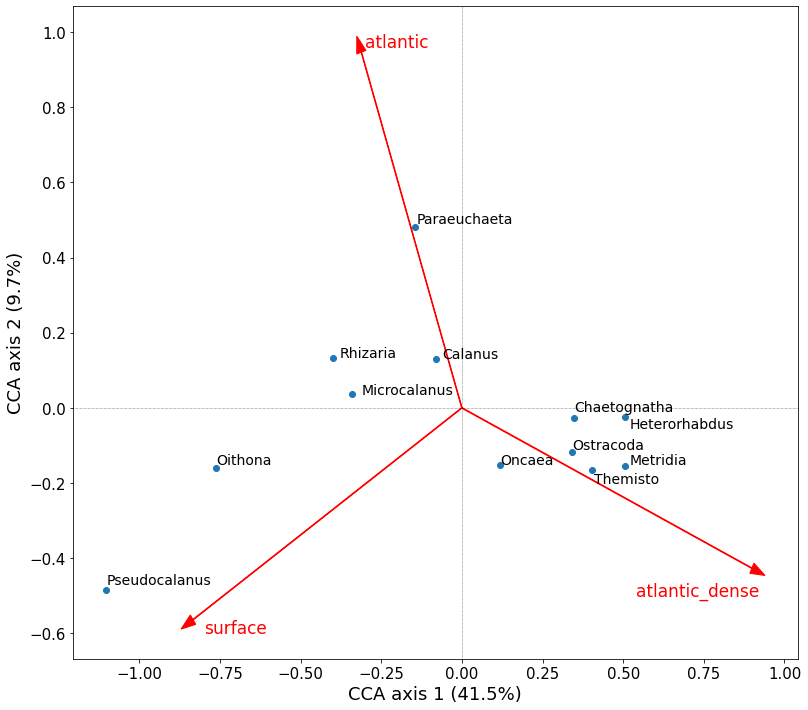

In [495]:
env_var = loki_count_df[['surface', 'atlantic', 'atlantic_dense']]
spp = loki_count_df[['Chaetognatha', 'Rhizaria', 'Ostracoda', 'Calanus', 'Heterorhabdus', 'Metridia', 'Microcalanus', 
                     'Oithona', 'Oncaea', 'Paraeuchaeta', 'Pseudocalanus', 'Themisto']]

loki_cca = cca(spp, env_var, scaling=2)
spp_cca = loki_cca.features
wm_cca = loki_cca.biplot_scores


print(loki_cca.proportion_explained)

fig = plt.figure(figsize =(13, 12))

plt.axhline(y=0, color='black', ls='dotted', linewidth=0.5)
plt.axvline(x=0, color='black', ls='dotted', linewidth=0.5)

# draw water mass arrow
for i in range(0, len(wm_cca['CCA1'])):
    plt.arrow(0, 0, wm_cca['CCA1'][i], wm_cca['CCA2'][i], width= 0.002, head_width=0.03, color='red')

# add point of spp.
plt.scatter(spp_cca['CCA1'], spp_cca['CCA2'])


# add text
plt.text(0.347943, -0.01 , 'Chaetognatha' , size=14)
plt.text(-0.38, 0.134, 'Rhizaria' , size=14)
plt.text(0.342, -0.11, 'Ostracoda' , size=14)
plt.text(-0.06, 0.130817, 'Calanus' , size=14)
plt.text(0.52, -0.055, 'Heterorhabdus' , size=14)
plt.text(0.52, -0.15, 'Metridia' , size=14)
plt.text(-0.31, 0.037, 'Microcalanus' , size=14)
plt.text(-0.76, -0.15, 'Oithona' , size=14)
plt.text(0.12, -0.15, 'Oncaea' , size=14)
plt.text(-0.14, 0.49, 'Paraeuchaeta' , size=14)
plt.text(-1.1, -0.47, 'Pseudocalanus' , size=14)
plt.text(0.41, -0.2, 'Themisto' , size=14)

plt.text(-0.8, -0.6, 'surface' , size=17, color='red')
plt.text(-0.3, 0.96, 'atlantic' , size=17, color='red')
plt.text(0.54, -0.5, 'atlantic_dense' , size=17, color='red')

plt.xlabel('CCA axis 1 (41.5%)', size=18)
plt.ylabel('CCA axis 2 (9.7%)', size=18)

plt.tick_params(axis='both', labelsize=15)


plt.savefig(os.path.join(plt_path,'CCA.pdf'), dpi=300)
plt.show()
plt.close()